<a href="https://colab.research.google.com/github/vibha-rajan/FacialRec/blob/master/Facial_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ageitgey/face_recognition.git

Cloning into 'face_recognition'...
remote: Enumerating objects: 874, done.
remote: Total 874 (delta 0), reused 0 (delta 0), pack-reused 874
Receiving objects: 100% (874/874), 101.46 MiB | 12.99 MiB/s, done.
Resolving deltas: 100% (506/506), done.


In [3]:
!ls

face_recognition  sample_data


In [4]:
cd face_recognition/

/content/face_recognition


In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 100.2MB 104kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=914e2dd99ac4fd0f99a53a025848a2ed2f539bb92886f307d4d04fb48f3f11d0
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [6]:
cd examples/

/content/face_recognition/examples


In [12]:
cd /content/face_recognition/examples/

/content/face_recognition/examples


In [35]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("Vibha_2.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("U_2.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Vibha",
    "Urjaswi"
]

# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("U_V_M_2.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
pil_image.show()

# You can also save a copy of the new image to disk if you want by uncommenting this line
pil_image.save("image_with_boxes.jpg")

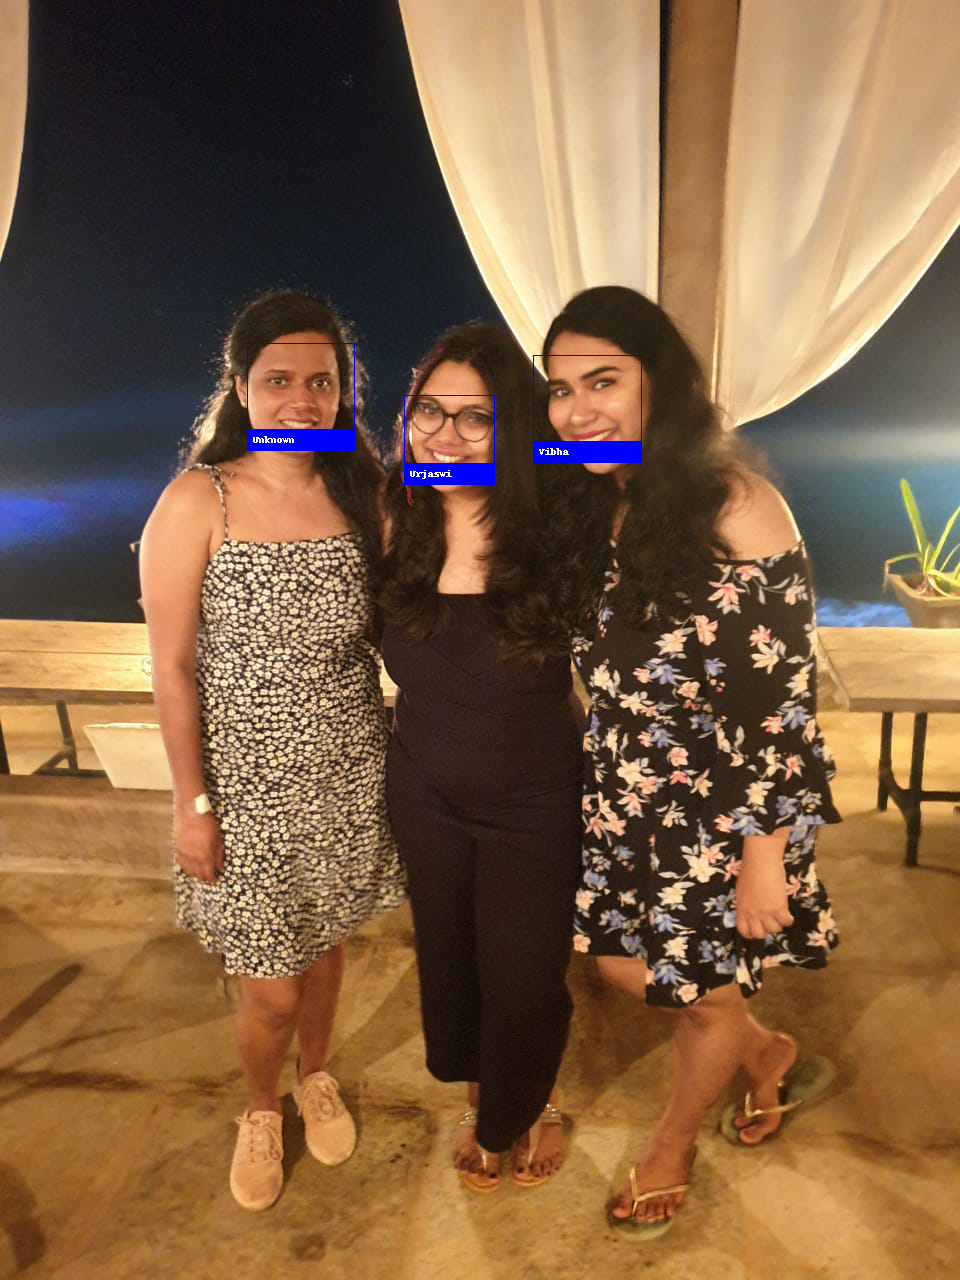

In [36]:
pil_image